# Heart Attack Analysis & Prediction Dataset - 심장마비 저위험 / 고위험 분류

## 데이터 로드 및 분석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

%matplotlib inline

In [ ]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

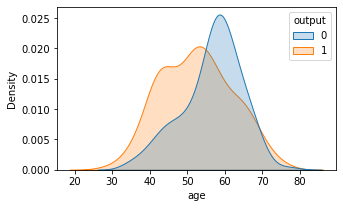

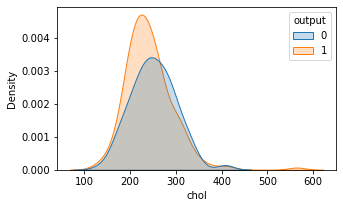

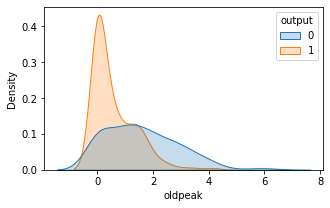

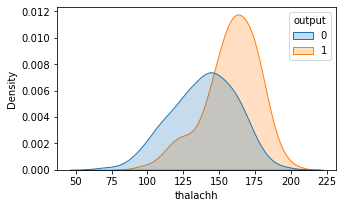

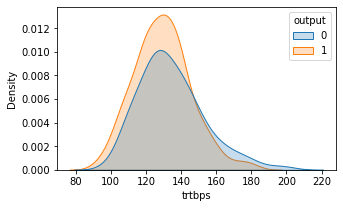

In [ ]:
num_cols = ['age', 'chol', 'oldpeak', 'thalachh', 'trtbps', 'output']

for col in num_cols[:-1]:
    plt.figure(figsize=(5, 3))
    sns.kdeplot(x=col, data=df[num_cols], hue='output', shade=True)

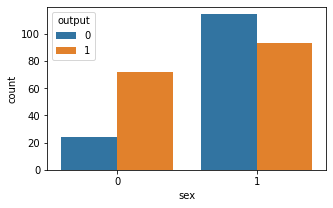

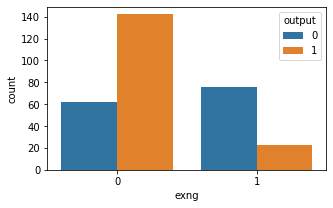

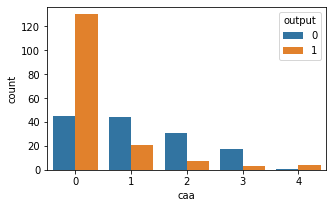

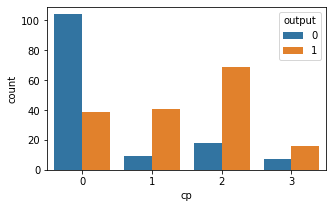

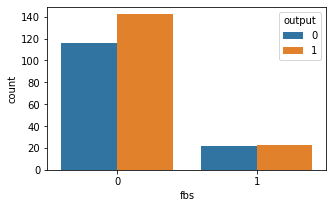

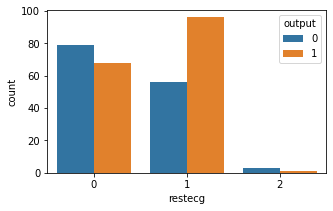

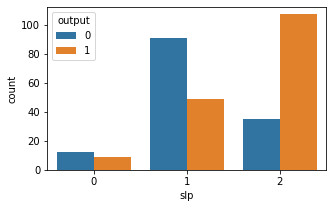

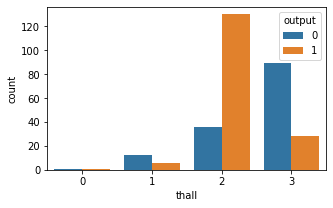

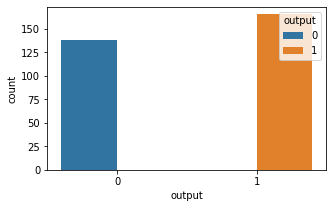

In [ ]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall', 'output']

for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df[cat_cols], hue='output')

<AxesSubplot:>

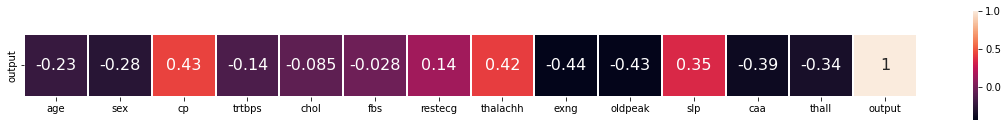

In [ ]:
c = df.corrwith(df['output']).to_frame()
c.columns = ['output']

plt.figure(figsize=(20, 2))
sns.heatmap(c.T, linewidths=0.1, vmax=1.0,
           square=True, linecolor='white', annot=True, annot_kws={'size': 16})

## 데이터 전처리 및 학습 데이터 설정

In [ ]:
df = df.drop(columns=['chol', 'trtbps', 'fbs', 'restecg'])
df

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,0.2,1,0,3,0
299,45,1,3,132,0,1.2,1,0,3,0
300,68,1,0,141,0,3.4,1,2,3,0
301,57,1,0,115,1,1.2,1,1,3,0


In [ ]:
df = pd.get_dummies(df, columns=['caa', 'cp', 'exng', 'sex', 'slp', 'thall'], drop_first = True)
df

,age,thalachh,oldpeak,output,caa_1,caa_2,caa_3,caa_4,cp_1,cp_2,cp_3,exng_1,sex_1,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,150,2.3,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1,37,187,3.5,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,41,172,1.4,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,56,178,0.8,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
4,57,163,0.6,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,123,0.2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
299,45,132,1.2,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
300,68,141,3.4,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
301,57,115,1.2,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1


In [ ]:
rows = len(df)
train_size = rows - 20

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,age,thalachh,oldpeak,output,caa_1,caa_2,caa_3,caa_4,cp_1,cp_2,cp_3,exng_1,sex_1,slp_1,slp_2,thall_1,thall_2,thall_3
0,41,168,0.0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0
1,60,155,3.0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
2,61,145,2.6,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0
3,52,162,0.5,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1
4,65,140,0.4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68,151,1.0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1
299,56,162,1.9,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1
300,58,156,0.1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
301,61,137,1.0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,0


In [ ]:
df[train_size:]['output']

283    0
284    1
285    1
286    1
287    1
288    0
289    1
290    1
291    0
292    1
293    0
294    1
295    0
296    0
297    1
298    1
299    1
300    0
301    1
302    1
Name: output, dtype: int64

In [ ]:
X_train = df[:train_size].drop(['output'], axis=1)
y_train = df[:train_size]['output']
X_test = df[train_size:].drop(['output'], axis=1)
y_test = df[train_size:]['output']

In [ ]:
X_train 

,age,thalachh,oldpeak,caa_1,caa_2,caa_3,caa_4,cp_1,cp_2,cp_3,exng_1,sex_1,slp_1,slp_2,thall_1,thall_2,thall_3
0,41,168,0.0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
1,60,155,3.0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
2,61,145,2.6,0,1,0,0,0,0,1,0,1,1,0,0,1,0
3,52,162,0.5,0,0,0,0,0,1,0,0,1,0,1,0,0,1
4,65,140,0.4,0,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,62,99,1.8,0,1,0,0,0,0,0,1,1,1,0,0,0,1
279,64,96,2.2,1,0,0,0,0,0,0,1,1,0,0,0,1,0
280,61,169,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
281,62,154,1.4,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [ ]:
y_train

0      1
1      0
2      0
3      1
4      1
      ..
278    0
279    0
280    0
281    0
282    0
Name: output, Length: 283, dtype: int64

## 로지스틱 회귀분석 (Logistic Regression)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lr.coef_

array([[-0.00689709,  0.01889205, -0.48143701, -1.36284216, -1.93858313,
        -1.04859275,  0.35767387,  0.64308503,  1.40445404,  1.19561284,
        -0.76490331, -1.09312841, -0.61314432,  0.22500739,  0.43189864,
         0.57642209, -0.79338793]])

In [ ]:
lr.intercept_

array([-0.68363043])

In [ ]:
lr.predict(X_train)

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [ ]:
lr.predict_proba(X_train)

array([[0.09202764, 0.90797236],
       [0.34049171, 0.65950829],
       [0.81601272, 0.18398728],
       [0.17939394, 0.82060606],
       [0.58446705, 0.41553295],
       [0.13164153, 0.86835847],
       [0.99305181, 0.00694819],
       [0.1457695 , 0.8542305 ],
       [0.79848987, 0.20151013],
       [0.179582  , 0.820418  ],
       [0.93867353, 0.06132647],
       [0.01122073, 0.98877927],
       [0.07854722, 0.92145278],
       [0.91385971, 0.08614029],
       [0.9630596 , 0.0369404 ],
       [0.09178754, 0.90821246],
       [0.99431117, 0.00568883],
       [0.93019217, 0.06980783],
       [0.2497952 , 0.7502048 ],
       [0.22019487, 0.77980513],
       [0.19417772, 0.80582228],
       [0.7308593 , 0.2691407 ],
       [0.97373799, 0.02626201],
       [0.9816773 , 0.0183227 ],
       [0.95745578, 0.04254422],
       [0.27069246, 0.72930754],
       [0.06217715, 0.93782285],
       [0.02356833, 0.97643167],
       [0.82303425, 0.17696575],
       [0.422528  , 0.577472  ],
       [0.

In [ ]:
y_pred_train = lr.predict(X_train)
print('Train Accuracy: %.2f' % accuracy_score(y_train, y_pred_train))
y_pred_test = lr.predict(X_test)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.86
Test Accuracy: 0.80


In [ ]:
print('Test Data:\t\t', list(y_test))
print('Predicted Test Data:\t', list(y_pred_test))

Test Data:		 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
Predicted Test Data:	 [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]


## KNN(K-nearest neighbors)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(np.mean(X_train_std), np.std(X_train_std))

-3.175362464943287e-17 1.0


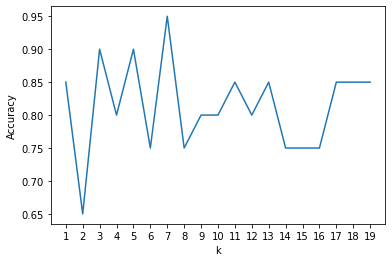

k = 7 일 때, 최대 Accuracy 0.95


In [ ]:
k_list = range(1, 20)
accuracies = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, 
                           p=2,
                           metric='minkowski')
    knn.fit(X_train_std, y_train)
    accuracies.append((knn.predict(X_test_std) == y_test).mean())
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_list)
plt.show()

k = accuracies.index(max(accuracies)) + 1
print('k =', k, '일 때, 최대 Accuracy' , max(accuracies))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k,
                           p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred_test = knn.predict(X_test_std)
print('Test Data:\t\t', list(y_test))
print('Predicted Test Data:\t', list(y_pred_test))

Test Data:		 [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
Predicted Test Data:	 [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]


# Heart Attack Analysis & Prediction Dataset 
# -  나이, 콜레스테롤, 심박수를 이용한 혈압 예측

# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/heart.csv") # dataset 불러옴
df = df.dropna() # NaN값/결측치 제거
df.head() # 일부분 출력

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
len(df) # 데이터 개수: 303개

303

# 데이터 전처리

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [4]:
data_x = df[['age', 'chol', 'thalachh']] # 독립변수: 차례대로 나이, 콜레스테롤, 심박수
data_y = df['trtbps'] # 종속변수: 혈압

이상치(outlier) 확인 및 제거

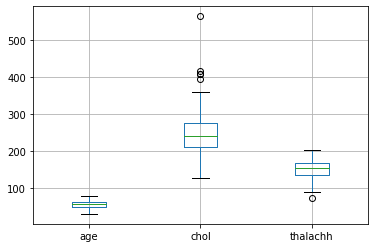

In [5]:
df.boxplot(column=['age', 'chol', 'thalachh'])

df : 303
IQR_df : 297


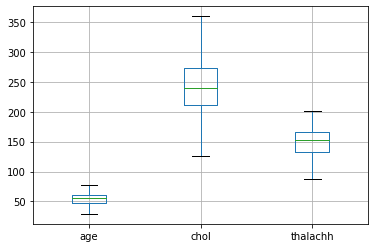

In [6]:
Q1 = df[['age','chol', 'thalachh']].quantile(q=0.25)
Q3 = df[['age','chol', 'thalachh']].quantile(q=0.75)
IQR = Q3-Q1

IQR_df = df[(df['age'] <= Q3['age']+1.5*IQR['age']) & (df['age'] >= Q1['age']-1.5*IQR['age'])]
IQR_df = df[(df['chol'] <= Q3['chol']+1.5*IQR['chol']) & (df['chol'] >= Q1['chol']-1.5*IQR['chol'])]
IQR_df = df[(df['thalachh'] <= Q3['thalachh']+1.5*IQR['thalachh']) & (df['thalachh'] >= Q1['thalachh']-1.5*IQR['thalachh'])&((df['chol'] < 390) & (df['chol'] >100))]


print('df :', len(df)) # 전처리 전 데이터의 개수
print('IQR_df :', len(IQR_df)) # 전처리 후 데이터의 개수

IQR_df.boxplot(['age','chol', 'thalachh'])

In [7]:
df = IQR_df

In [ ]:
def getNonLinearRelationship(label): #비선형 관계 모델링 함수 정의
  X = df[[label]].values
  y = df['trtbps'].values

  regr = LinearRegression()

  quadratic = PolynomialFeatures(degree=2)
  cubic = PolynomialFeatures(degree=3)
  X_quad = quadratic.fit_transform(X)
  X_cubic = cubic.fit_transform(X)

  X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

  regr = regr.fit(X, y)
  y_lin_fit = regr.predict(X_fit)
  linear_r2 = r2_score(y, regr.predict(X))

  regr = regr.fit(X_quad, y)
  y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
  quadratic_r2 = r2_score(y, regr.predict(X_quad))

  regr = regr.fit(X_cubic, y)
  y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
  cubic_r2 = r2_score(y, regr.predict(X_cubic))

  plt.scatter(X, y, label='training points', color='lightgray')

  plt.plot(X_fit, y_lin_fit, 
          label='linear (d=1), $R^2=%.2f$' % linear_r2, 
          color='blue', 
          lw=2, 
          linestyle=':')

  plt.plot(X_fit, y_quad_fit, 
          label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
          color='red', 
          lw=2,
          linestyle='-')

  plt.plot(X_fit, y_cubic_fit, 
          label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
          color='green', 
          lw=2, 
          linestyle='--')

  plt.xlabel(label)
  plt.ylabel('blood pressure(mmHg)')
  plt.legend(loc='upper right')
  plt.show()

# 비선형관계 모델링 - polynomianl regression 활용 / R^2 (결정계수) 확인

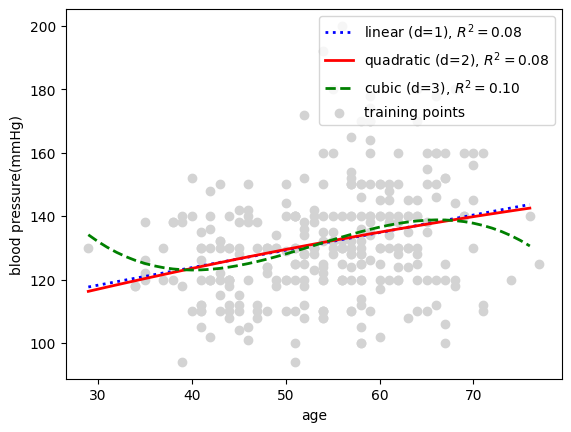

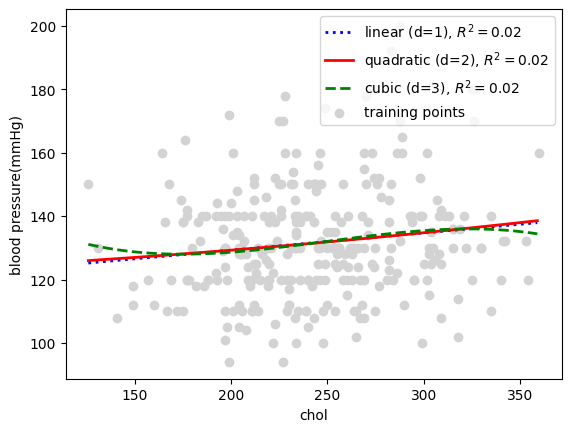

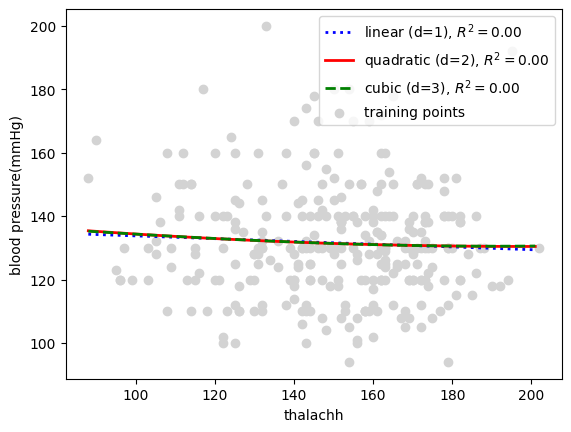

In [ ]:
for label in ['age', 'chol', 'thalachh']:
  getNonLinearRelationship(label)

앞에서 이상치를 제거했음에도 불구하고 R2 score가 거의 0에 가까운 모습을 확인할 수 있음 -> 쓸모 없는 모델

+ 이상치 제거하기 전과 R2 score 차이 없음

# 가장 R2 score가 높은 회귀 모델 찾기 
(Ridge와 Lasso의 경우에는 최적의 alpha 값 찾기)

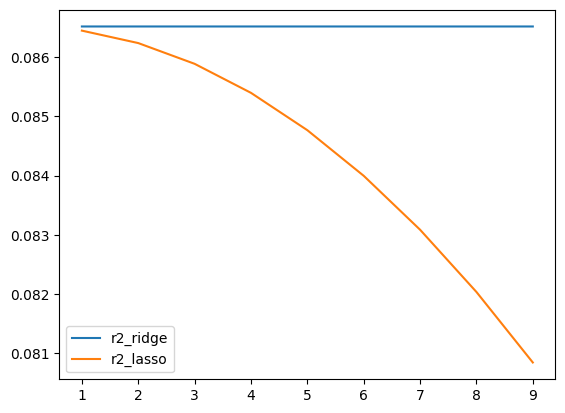

----------------------------------
Maximum R^2_ridge: 0.08652
MSE linear_reg: 280.048
R^2 linear_reg: 0.087
----------------------------------


In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
alpha = [i for i in range(1, 10, 1)]
r2_ridge, r2_lasso = [], []
MSE_ridge, MSE_lasso = [], []

for i in range(1, 10, 1):
  ridge = Ridge(alpha=i)
  ridge.fit(data_x, data_y)
  y_pred = ridge.predict(data_x)

  r2_ridge.append(r2_score(data_y, y_pred))
  MSE_ridge.append(mean_squared_error(data_y, y_pred))

  lasso = Lasso(alpha=i)
  lasso.fit(data_x, data_y)
  y_pred = lasso.predict(data_x)

  r2_lasso.append(r2_score(data_y, y_pred))
  MSE_lasso.append(mean_squared_error(data_y, y_pred))


plt.plot(alpha, r2_ridge, label='r2_ridge')
plt.plot(alpha, r2_lasso, label='r2_lasso')
plt.legend()
plt.show()

linear_reg = LinearRegression()
linear_reg.fit(data_x, data_y)
y_pred = linear_reg.predict(data_x)

print("----------------------------------")
print("Maximum R^2_ridge: %.5f" % (
        max(r2_ridge)))

print('MSE linear_reg: %.3f' % (
        mean_squared_error(data_y, y_pred)))
print('R^2 linear_reg: %.3f' % (
        r2_score(data_y, y_pred)))

print("----------------------------------")

Linear regresson보다 ridge나 lasso에서 더 높은 R2 score를 원했지만, 결과는 정반대임을 확인할 수 있었다.

+ Ridge가 Lasso보다 R^2가 높은 걸로 보아 선택한 특성의 중요도가 전체적으로 비슷하다는 것을 알 수 있다.

# 최적의 모델(polynominal regression(d=3) > linear regression > ridge > lasso이므로 polynominal regresssion(d=3)가 최적의 모델)으로 예측 진행

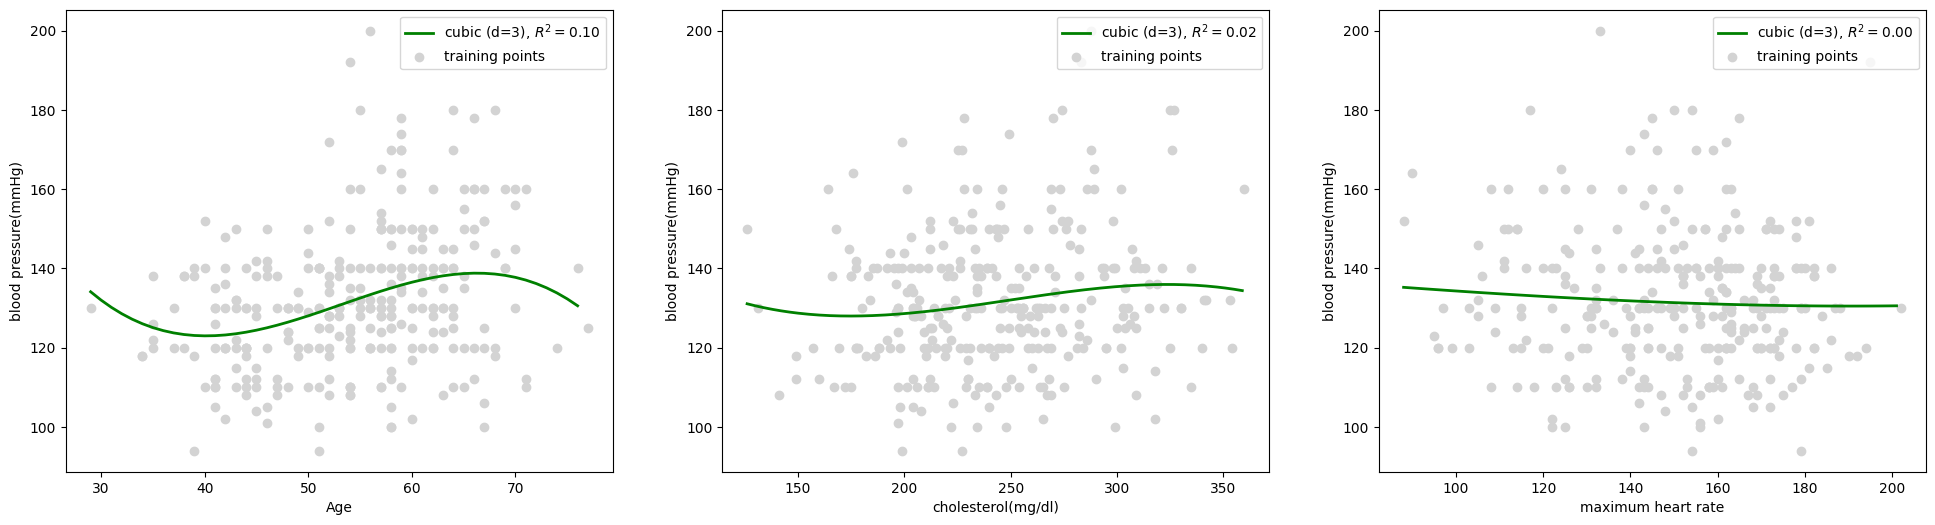

In [ ]:
plt.style.use('default')

fig = plt.figure(figsize=(24, 6))
 
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
axes = [ax1, ax2, ax3]

labels = ['age','chol', 'thalachh']
plot_labels = ['Age', 'cholesterol(mg/dl)', 'maximum heart rate']

for idx, ax in enumerate(axes):
  X = df[[labels[idx]]].values
  y = df['trtbps'].values

  regr = LinearRegression()
  cubic = PolynomialFeatures(degree=3)
  X_cubic = cubic.fit_transform(X)

  X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

  regr = regr.fit(X_cubic, y)
  y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
  cubic_r2 = r2_score(y, regr.predict(X_cubic))

  ax.scatter(X, y, label='training points', color='lightgray')
  ax.plot(X_fit, y_cubic_fit, 
          label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
          color='green', 
          lw=2)

  ax.set_xlabel(plot_labels[idx])
  ax.set_ylabel('blood pressure(mmHg)')
  ax.legend(loc='upper right')
plt.show()

+ 결론: 나이,콜레스테롤 ~ 혈압: (+), 심박수 ~ 혈압: (확인 불가)
+ 나이와 콜레스테롤의 경우에는 d=1에서 진행했을 경우 아주 약간의 양의 상관관계가 확인되지만, (최대)심박수의 경우 d와 상관없이 전혀 확인되지 않음

In [ ]:
data_x = data_x.values.reshape(-1,3) 

In [ ]:
x = data_x[:, 0]
y = data_x[:, 1]
z = data_x[:, 2]
c = data_y

# 다중선형회귀(나이,콜레스테롤,심박수 ~ 혈압) - 번외

In [ ]:
lr = LinearRegression()
lr.fit(data_x, data_y)

x = data_x[:, 0]
y = data_x[:, 1]
z = data_x[:, 2]
c = data_y

#각 독립변수들의 range 지정: 데이터 중 최소값, 최대값, 그 구간을 40으로 설정
x_pred = np.linspace(df['age'].min(), df['age'].max(), 40)
y_pred = np.linspace(df['chol'].min(), df['chol'].max(), 40)
z_pred = np.linspace(df['thalachh'].min(), df['thalachh'].max(), 40)

xx_pred, yy_pred, zz_pred = np.meshgrid(x_pred, y_pred, z_pred) # 격자무늬
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten(), zz_pred.flatten()], dtype=object).T

predicted = lr.predict(model_viz)

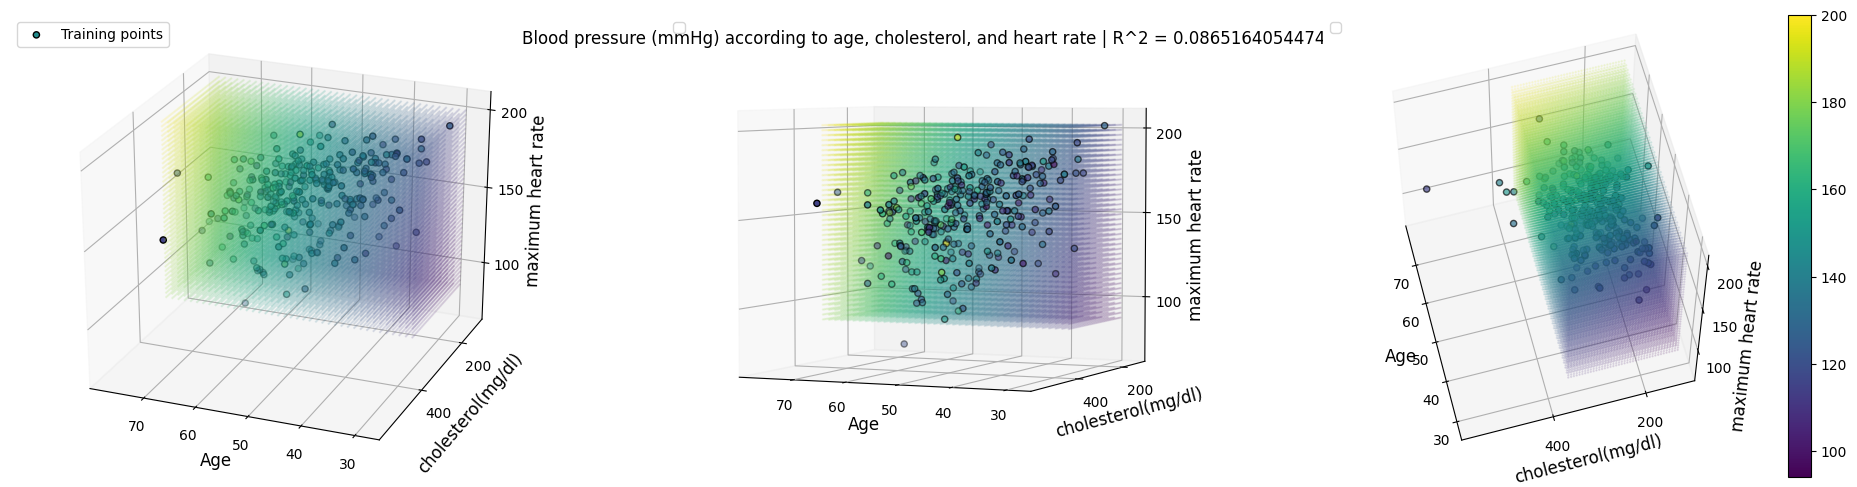

In [ ]:
plt.style.use('default')

fig = plt.figure(figsize=(24, 6))
 
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
 
for idx, ax in enumerate(axes):
    if idx == 1:
      ax.set_title(f'Blood pressure (mmHg) according to age, cholesterol, and heart rate | R^2 = {lr.score(data_x, data_y)}')
    ax.scatter(x, y, z, c = c, edgecolor='#000000', label= "Training points" if idx == 0 else None) # Training points
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), zz_pred.flatten(), marker='D', s=predicted/294, c=predicted/294, alpha=0.12) # Fit
    
    ax.set_xlabel('Age', fontsize=12) # 독립변수 1
    ax.set_ylabel('cholesterol(mg/dl)', fontsize=12) # 독립변수 2
    ax.set_zlabel('maximum heart rate', fontsize=12) # 독립변수 3
    ax.locator_params(nbins=6, axis='x')
    ax.locator_params(nbins=4, axis='y')
    ax.locator_params(nbins=4, axis='z')
    ax.legend(loc='upper left')

    #높이/방위각을 조절
    #elev(높이), azim(방위각)
    ax1.view_init(elev=27, azim=112) 
    ax2.view_init(elev=4, azim=114)
    ax3.view_init(elev=60, azim=165)

import matplotlib as mpl  
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
fig.colorbar(mpl.cm.ScalarMappable(norm=norm))

+ 4차원을 시각화하는 것은 불가능하기 때문에, 독립변수 3가지를 각각 x, y, z축에 위치시킨 뒤, 종속변수를 색상으로 나타내었다. 

+ 점: 실제 데이터, 반투명 색상: 예측 데이터

+ 보라색 ~> 노란색: 종속변수(혈압) 증가

+ 결론: 나이가 증가 / 콜레스테롤 증가 / 심박수 증가 ~> 혈압 증가